# Visualization of MFCC

The Mel Frequency Cepstrum Coefficient should allow to visualize the 'deconvolution' of an audio file. The coefficients indicates the values of the 'rhamonics'. If a coefficient is high enough, we can say it represents a time-series.

The goal is then : 
    - identify the rhamonics
    - plot the coefficients and eventually the cepstrum
    - select the coefficients represented by a low quefrency
    
Why low Quefrency ?
    High quefrency refer to time-series varying at high frequency. These are typically not used as they don't explain the dynamic of the process and induces a lot of variance.
    Low quefrency are the opposite and tend to show which 'rhamonics' (or fondamentals) can be used to model the process.

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from pathlib import Path
import soundfile as sf

In [10]:
hyper_param = {}
write_path = 'C:/Users/carbo/Documents/MIMII/ProcessedData/+6dB/'

dict_method = {0:'psd', 1:'spectro', 2:'mfcc'}

for method in dict_method.items():
    hyper_param['method_name'] = method                             #select processing method
    print(method[1])

(0, 'psd')
(1, 'spectro')
(2, 'mfcc')


In [109]:
def import_audio_data(machine_name : str, file_num : int, channel : int, status : str = "normal", n_mfcc : int = 15):
    data_folder = 'C:/Users/carbo/Documents/MIMII/RawData/+6dB/'
    file_path = Path(data_folder + machine_name + '/id_00/' + status)
    files = list(file_path.glob('**/*'))
    audio_file = files[file_num]
    signal, sr = sf.read(audio_file)
    signal = signal[:,channel]
    mfccs = librosa.feature.mfcc(signal, n_mfcc = 15, sr=sr)
    return sr, mfccs

def plot_mfccs(mfccs, sr, status : str = "normal") -> None:
    plt.figure(figsize=(12,10))
    librosa.display.specshow(mfccs,x_axis = "time", sr=sr)
    plt.colorbar(format="%+2f")
    plt.title(status)
    plt.show()

# Visualization of an abnormal fan MFCCS

In [124]:
# Getting normal audio
sr, normal_mfccs = import_audio_data(machine_name = 'fan', file_num = 0, channel = 0 )
normal_delta_mfccs = librosa.feature.delta(normal_mfccs)
normal_delta2_mfccs = librosa.feature.delta(normal_mfccs, order = 2)
# Getting abnormal audio
sr, abnormal_mfccs = import_audio_data( 'fan', file_num = 0, channel = 0 , status = "abnormal")
abnormal_delta_mfccs = librosa.feature.delta(abnormal_mfccs)
abnormal_delta2_mfccs = librosa.feature.delta(abnormal_mfccs, order = 2)

C:\Users\carbo\AppData\Local\Temp\ipykernel_17692\4013161888.py:8: FutureWarning: Pass y=[ 0.00143433  0.00106812  0.00045776 ... -0.00344849 -0.00131226
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc = 15, sr=sr)
C:\Users\carbo\AppData\Local\Temp\ipykernel_17692\4013161888.py:8: FutureWarning: Pass y=[-0.00112915  0.00125122  0.00219727 ...  0.00518799  0.00305176
  0.00146484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc = 15, sr=sr)


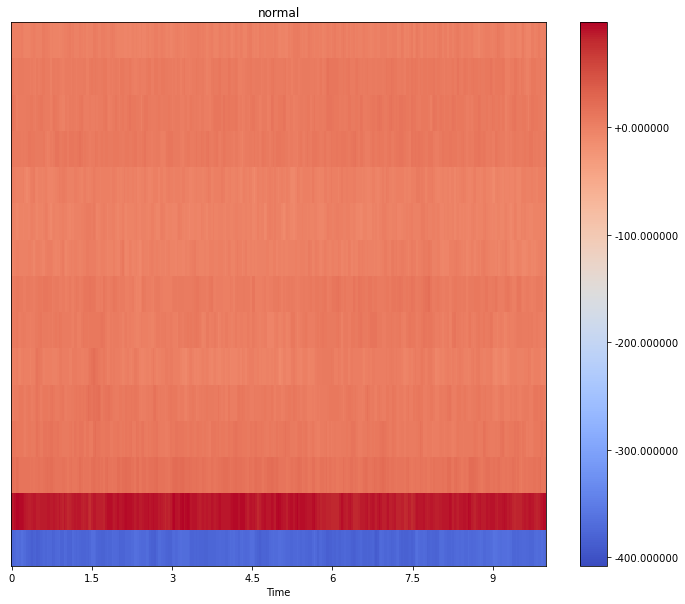

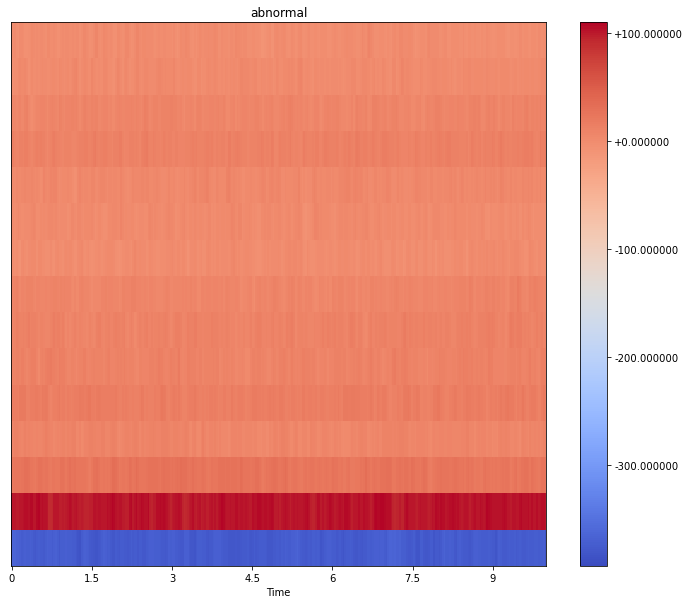

In [125]:
plot_mfccs(normal_mfccs,sr)
plot_mfccs(abnormal_mfccs,sr, status = 'abnormal')

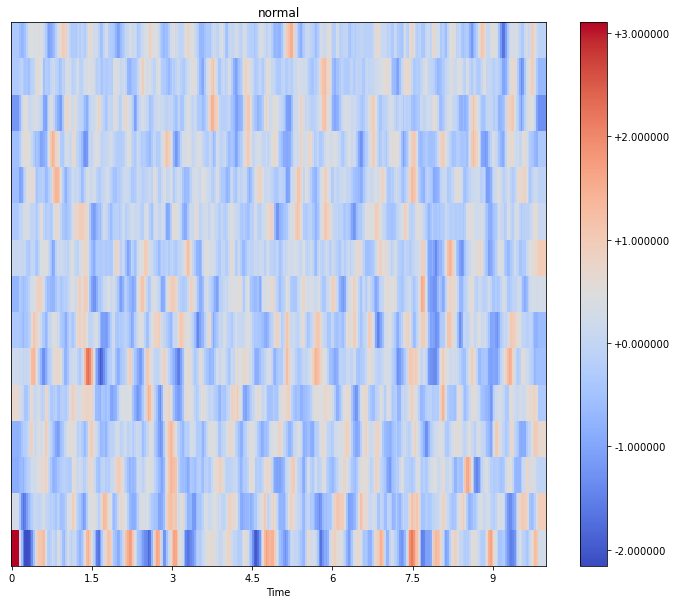

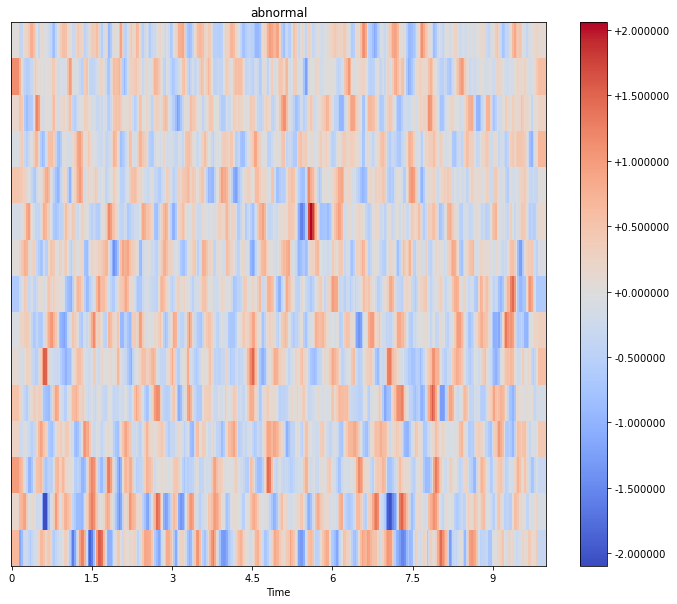

In [115]:
plot_mfccs(normal_delta_mfccs,sr)
plot_mfccs(abnormal_delta_mfccs,sr, status = 'abnormal')

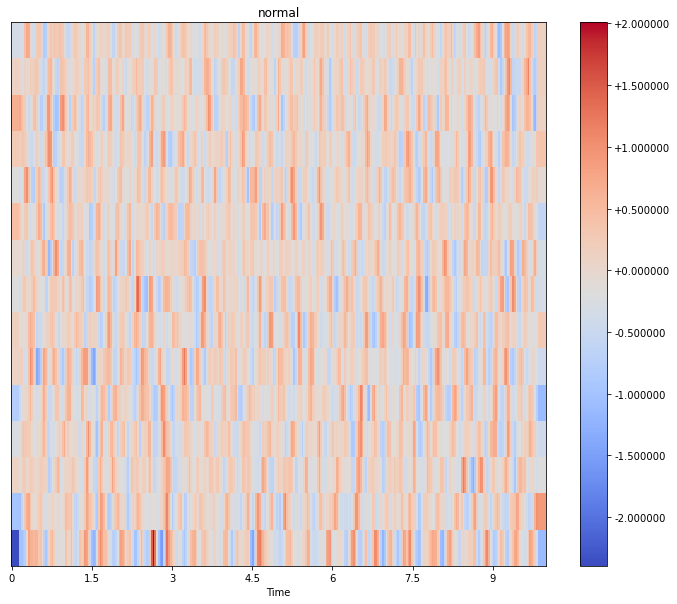

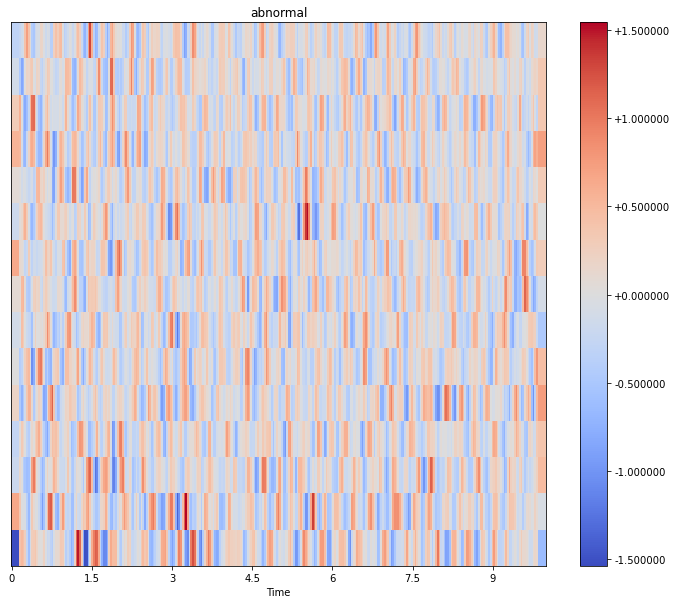

In [116]:
plot_mfccs(normal_delta2_mfccs,sr)
plot_mfccs(abnormal_delta2_mfccs,sr, status = 'abnormal')

# Visualization of an abnormal valve MFCCS

Les mfccs semblents pouvoir représenter efficacement les événements liés au phénomènes non stationnaires :
    - Représentation concise
  
$Attention $! Pour établier un score d'anomalie il faudra veiller à normalizer les features de :
    - MFCC, deltaMFCC & delta2MFCC $indépendamment$ !!! Car sinon les delta seront casi négligeables !

In [119]:
# Getting normal audio
sr, normal_mfccs = import_audio_data(machine_name = 'valve', file_num = 5, channel = 0 )
normal_delta_mfccs = librosa.feature.delta(normal_mfccs)
normal_delta2_mfccs = librosa.feature.delta(normal_mfccs, order = 2)
# Getting abnormal audio
sr, abnormal_mfccs = import_audio_data( 'valve', file_num = 5, channel = 0 , status = "abnormal")
abnormal_delta_mfccs = librosa.feature.delta(abnormal_mfccs)
abnormal_delta2_mfccs = librosa.feature.delta(abnormal_mfccs, order = 2)

C:\Users\carbo\AppData\Local\Temp\ipykernel_17692\4013161888.py:8: FutureWarning: Pass y=[ 2.68554688e-03  1.52587891e-03  2.83813477e-03 ... -1.06811523e-03
 -3.05175781e-05 -3.35693359e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc = 15, sr=sr)
C:\Users\carbo\AppData\Local\Temp\ipykernel_17692\4013161888.py:8: FutureWarning: Pass y=[-5.18798828e-04 -3.96728516e-04 -6.40869141e-04 ...  1.06811523e-03
  9.15527344e-05 -6.71386719e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc = 15, sr=sr)


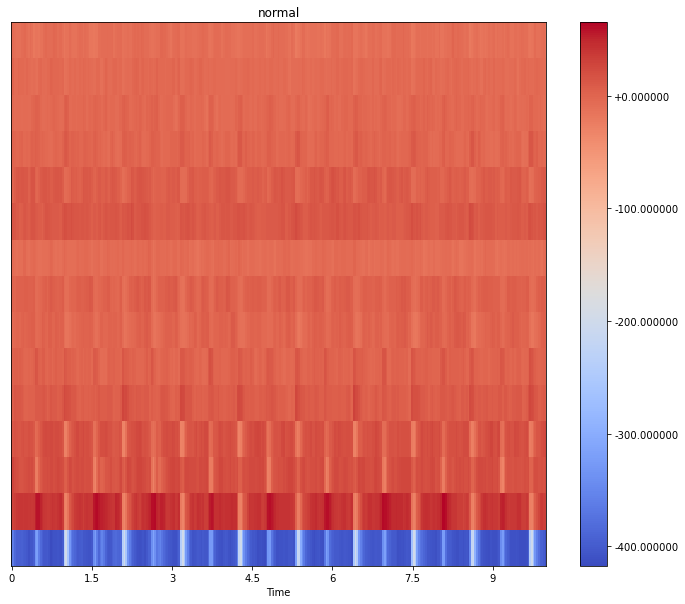

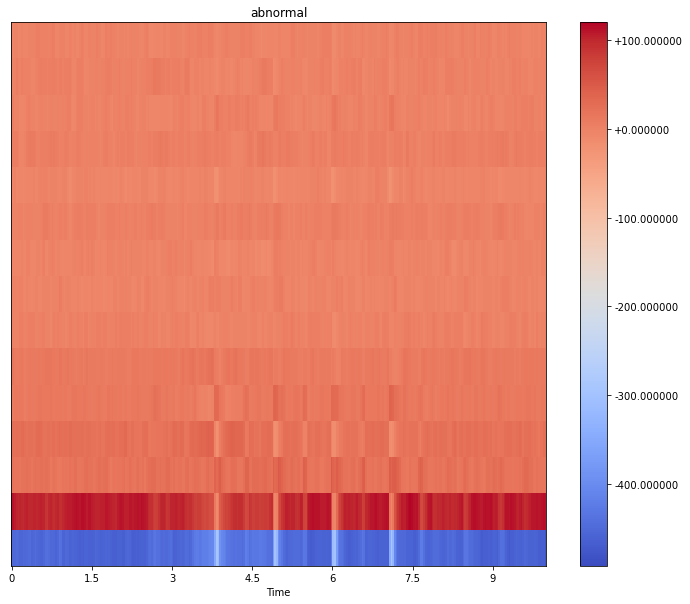

In [120]:
plot_mfccs(normal_mfccs,sr)
plot_mfccs(abnormal_mfccs,sr, status = 'abnormal')

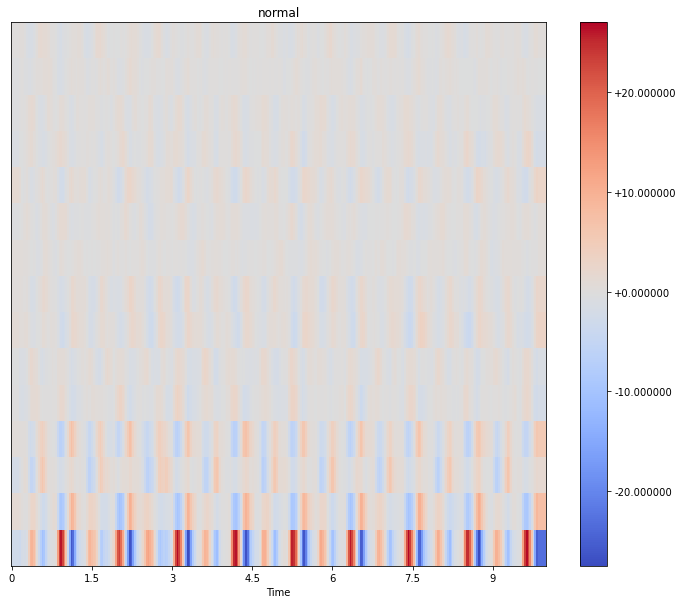

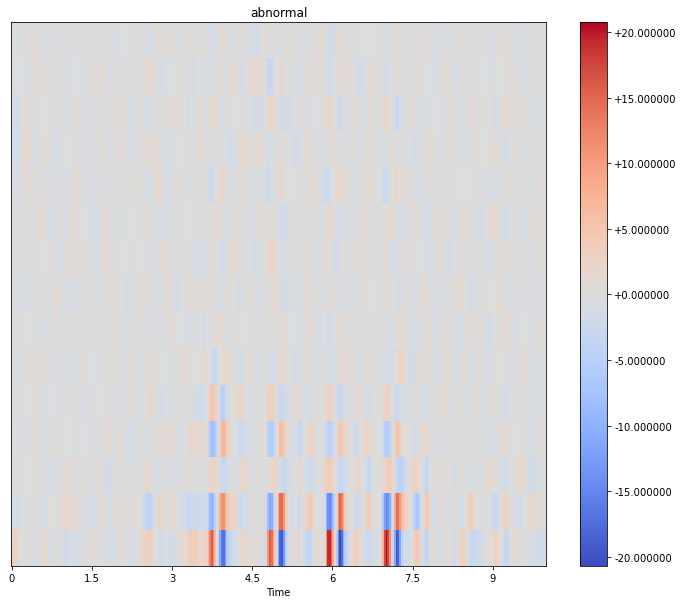

In [122]:
plot_mfccs(normal_delta_mfccs,sr)
plot_mfccs(abnormal_delta_mfccs,sr, status = 'abnormal')

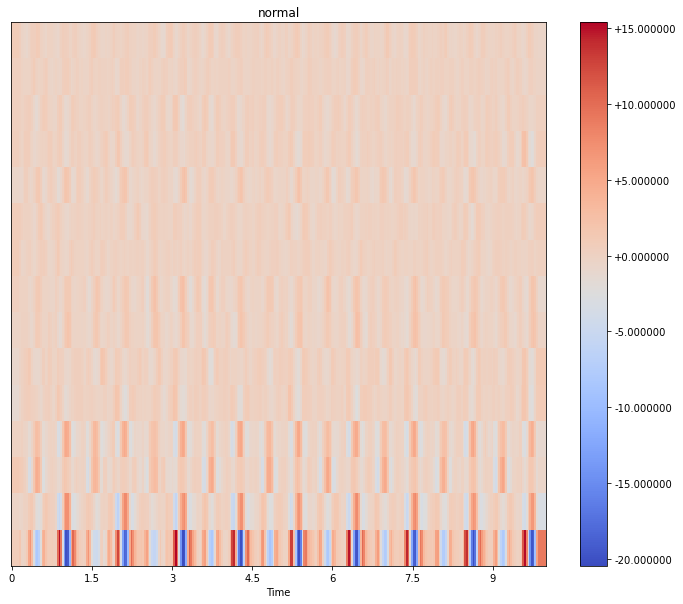

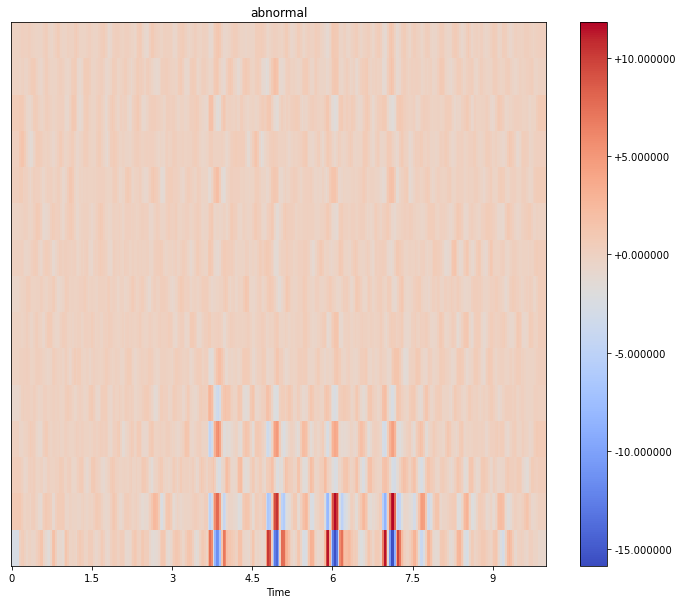

In [121]:
plot_mfccs(normal_delta2_mfccs,sr)
plot_mfccs(abnormal_delta2_mfccs,sr, status = 'abnormal')